In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import DataFrame, Series
import seaborn as sns
from matplotlib.pyplot import show
import warnings
from collections import Counter
from sklearn.feature_selection import RFE
from matplotlib.pyplot import show

In [23]:
df=pd.read_csv("ks-projects-201801.csv")

In [24]:
df 

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


No. 1 

In [25]:
df.isnull().sum().sort_values(ascending=False)

usd pledged         3797
name                   4
usd_goal_real          0
usd_pledged_real       0
country                0
backers                0
state                  0
pledged                0
launched               0
goal                   0
deadline               0
currency               0
main_category          0
category               0
ID                     0
dtype: int64

In [26]:
del df['usd pledged']

In [27]:
df

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,65000.00


Note : we droppped the column usd pledged from analysis as we are not using that particular column in our analysis and this column ha sthe maximum missing values.

No.2 

In [28]:
df.main_category.value_counts().sort_values(ascending=False)

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

No. 3

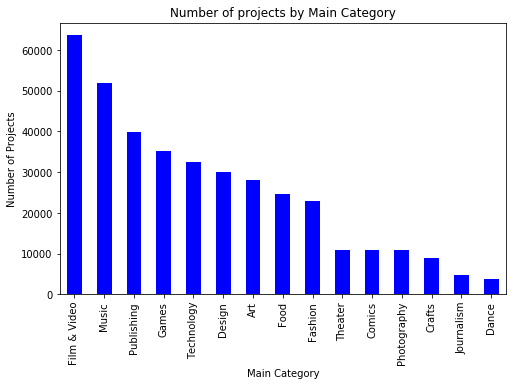

In [29]:
plt.figure(figsize=(8,5))
plt.xlabel('Main Category')
plt.ylabel('Number of Projects')
plt.title('Number of projects by Main Category')
df.main_category.value_counts().sort_values(ascending=False).plot(kind='bar', color='blue')
plt.show()

No. 4

In [30]:
# Calculate the successful rate of each main category
state_main_category_count = pd.crosstab(df['state'],df['main_category'],margins=True)
state_main_category_rate = (state_main_category_count/state_main_category_count.loc['All']*100).round(2)
state_main_category_rate

main_category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater,All
state,,,,,,,,,,,,,,,,
canceled,7.89,7.78,9.57,4.33,13.81,11.61,9.05,8.99,17.60,11.00,6.37,9.15,9.03,14.48,5.57,10.24
failed,50.19,37.30,64.74,32.78,49.27,62.16,51.75,64.91,45.42,65.97,41.90,59.23,58.05,63.30,33.98,52.22
live,0.69,0.70,0.86,0.48,1.01,1.10,0.52,0.75,0.81,0.65,0.54,0.45,0.75,1.16,0.38,0.74
successful,40.88,54.00,24.01,62.05,35.08,24.51,37.15,24.73,35.53,21.28,46.61,30.66,30.85,19.75,59.87,35.38
suspended,0.34,0.21,0.82,0.35,0.82,0.60,0.18,0.62,0.62,1.09,0.29,0.51,0.17,1.30,0.19,0.49
undefined,0.00,0.00,0.00,0.03,0.01,0.01,1.34,0.00,0.00,0.00,4.30,0.01,1.16,0.01,0.01,0.94
All,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00


In [31]:
# Remove 'All' column and row
state_main_category_rate = state_main_category_rate.drop(['All'],axis=0)
state_main_category_rate = state_main_category_rate.drop(['All'],axis=1)

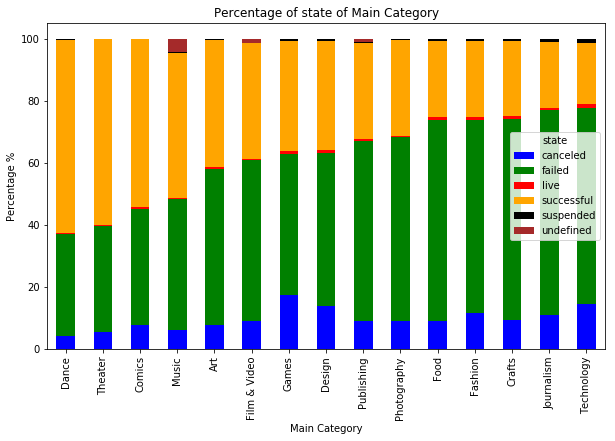

In [32]:
# Successful rate by main category in descending order
state_main_category_rate.T.sort_values('successful', ascending=False).plot(kind='bar', stacked=True, figsize=(10,6),
                color=['blue','green','red','orange','black','brown'])
plt.title('Percentage of state of Main Category')
plt.xlabel('Main Category')
plt.ylabel('Percentage %')
plt.show()

No . 5 

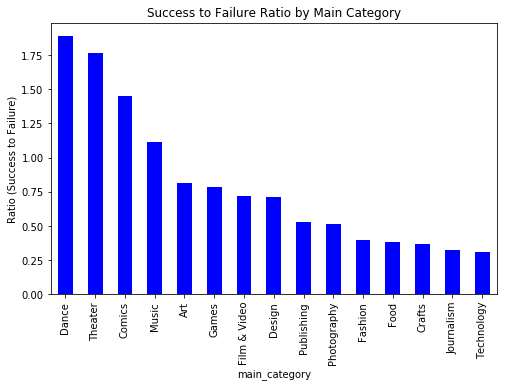

In [33]:
plt.figure(figsize=(8,5))
plt.title('Success to Failure Ratio by Main Category')
plt.ylabel('Ratio (Success to Failure)') 
catPivot = df.pivot_table(index='main_category', columns='state', values='ID', aggfunc='count', margins=False)
catPivot['SFratio'] = catPivot['successful'] / catPivot['failed']
catPivot['SFratio'].sort_values(ascending=False).plot(kind='bar', color='blue')
plt.show()

No. 6 

In [34]:
df[df.state=='successful'].groupby(['main_category'])['usd_goal_real'].median()

main_category
Art              2000.00
Comics           2619.71
Crafts           1000.00
Dance            3000.00
Design           7500.00
Fashion          5000.00
Film & Video     5000.00
Food             7343.91
Games            5000.00
Journalism       3000.00
Music            3210.12
Photography      3000.00
Publishing       3000.00
Technology      10000.00
Theater          2650.00
Name: usd_goal_real, dtype: float64

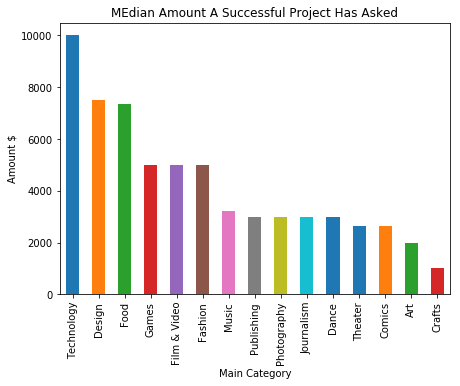

In [35]:
plt.figure(figsize=(7,5))
df[df.state=='successful'].groupby(['main_category'])['usd_goal_real'].median().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Main Category')
plt.ylabel('Amount $')
plt.title('MEdian Amount A Successful Project Has Asked')
plt.show()

Note : this the median amount asked for 

No . 7 

In [37]:
mpb= df['$/backer']=df['usd_goal_real']/df['backers']
df[df.state=='successful'].groupby(['main_category'])['$/backer'].median().round(2)

main_category
Art             43.75
Comics          24.82
Crafts          28.21
Dance           62.50
Design          37.72
Fashion         55.56
Film & Video    69.62
Food            66.67
Games           20.73
Journalism      45.45
Music           52.63
Photography     51.61
Publishing      41.96
Technology      50.72
Theater         56.07
Name: $/backer, dtype: float64

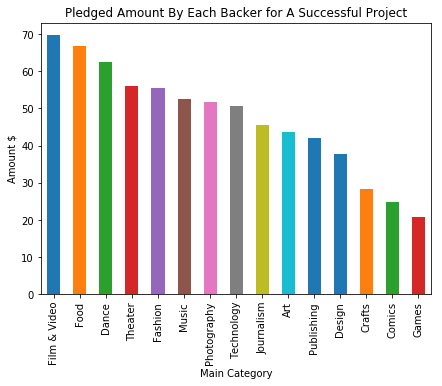

In [38]:
plt.figure(figsize=(7,5))
df[df.state=='successful'].groupby(['main_category'])['$/backer'].median().sort_values(ascending=False).plot(kind= 'bar')

plt.xlabel('Main Category')
plt.ylabel('Amount $')
plt.title('Pledged Amount By Each Backer for A Successful Project')
plt.show()

Note : this is the median amount given 

No .  8 

In [39]:
# Convert launched and deadline to datatime
from datetime import datetime
df['deadline'] = [datetime.strptime(x, '%Y-%m-%d') for x in df.deadline]
df['launched'] = [datetime.strptime(x, '%Y-%m-%d %H:%M:%S') for x in df.launched]

In [40]:

# Create columns to store year, month, day, duration
#
df['duration'] = (df.loc[:, 'deadline'] - df.loc[:, 'launched']).apply(lambda l: l.days)
df['launched_month'] = df.loc[:, 'launched'].apply(lambda l: l.month)
df['launched_year'] = df.loc[:, 'launched'].apply(lambda l: l.year)
df['launched_day'] = df.loc[:, 'launched'].apply(lambda l: l.dayofyear)
df['deadline_month'] = df.loc[:, 'deadline'].apply(lambda l: l.month)
df['deadline_year'] = df.loc[:, 'deadline'].apply(lambda l: l.year)
df['deadline_day'] = df.loc[:, 'deadline'].apply(lambda l: l.dayofyear)
df['duration_5'] = np.ceil(df.loc[:, 'duration'] / 5) * 5
df['succeed'] = np.where(df['state'] == 'successful', 1, 0)
df['log10_usd_goal_real'] = np.log10(df['usd_goal_real'])

In [41]:
years_values = sorted(df.loc[:, 'launched_year'].unique())
for year in years_values:
    month_values = sorted(df[df['launched_year']==year].loc[:, 'launched_month'].unique())
    print (year, month_values)

1970 [1]
2009 [4, 5, 6, 7, 8, 9, 10, 11, 12]
2010 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2011 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2012 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2013 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2014 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2015 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2016 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2017 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2018 [1]


In [42]:
# Set the values of year for analysis
years_values = [2010,2011,2012,2013,2014,2015,2016,2017]

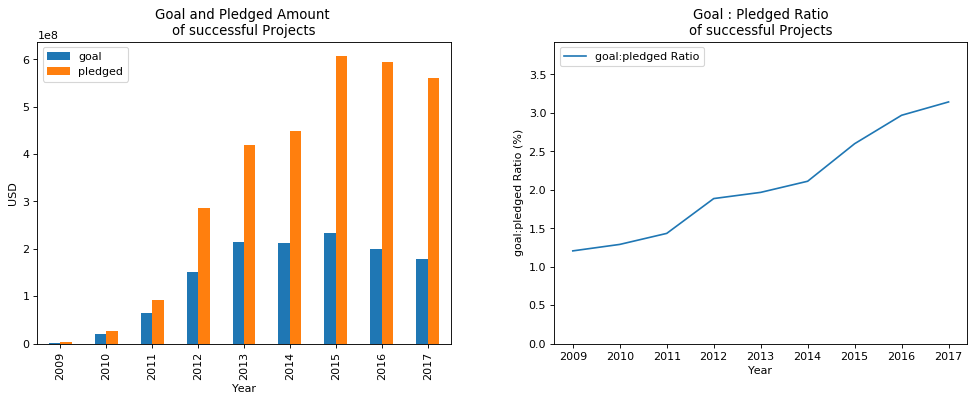

In [44]:
# Compare the Goal and Pledged amount by year and calculate the ratio
#
yearFund = df[df['state']=='successful'].groupby(['launched_year'])['usd_goal_real','usd_pledged_real'].sum() 
goal_pledged_ratio = yearFund['usd_pledged_real'] / yearFund['usd_goal_real']

fig = plt.figure(figsize=(15, 5), dpi= 80)
fig.tight_layout() 
plt.subplots_adjust(wspace = .25)

ax1 = plt.subplot(1, 2, 1)
ax1.set_title('Goal and Pledged Amount \nof successful Projects')

yearFund.plot.bar(ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('USD')
# ax1.set_ylim(0,yaxis_lim)
ax1.legend(['goal','pledged'], loc=2)

ax2 = plt.subplot(1, 2, 2)
ax2.set_title('Goal : Pledged Ratio\nof successful Projects')
ax2.set_ylabel('goal:pledged Ratio (%)')
ax2.set_xlabel('Year')
#ax2.set_ylim(min=0)
ax2.set_ylim(ymin=0, ymax=max(goal_pledged_ratio.values)*1.25)
ax2.plot(goal_pledged_ratio)
ax2.legend(['goal:pledged Ratio'], loc=2)

plt.show()

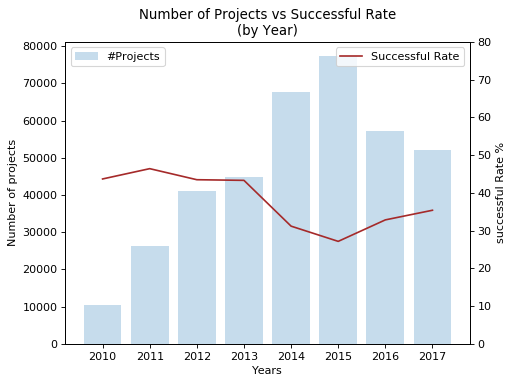

In [45]:
# to compare the number of launched project and the succesful rate by year

project_year_count = df.launched_year.value_counts().sort_index(ascending=True)
project_year_count = project_year_count[years_values]

state_year_count = pd.crosstab(df['state'],df['launched_year'],margins=True)
state_year_rate = (state_year_count/state_year_count.loc['All']*100).round(2)
state_year_rate = state_year_rate.drop(['All']).drop(['All'],axis=1)
state_year_success_rate = state_year_rate.loc['successful', years_values]

fig = plt.figure(figsize=(15, 5), dpi= 80)
fig.tight_layout() 
plt.subplots_adjust(wspace = .3)

ax1 = plt.subplot(1, 2, 1)
plt.title('Number of Projects vs Successful Rate\n(by Year)')

ax2 = ax1.twinx()
ax1.bar(project_year_count.index, project_year_count.values, alpha = 0.25)
ax1.set_xlabel('Years')
ax1.set_ylabel('Number of projects')
ax1.legend(['#Projects'], loc=2)

ax2.set_ylabel('successful Rate %')
ax2.set_ylim(0,80)
ax2.plot(years_values, state_year_success_rate.values, color = 'brown')
ax2.legend(['Successful Rate'], loc=1)

plt.show()

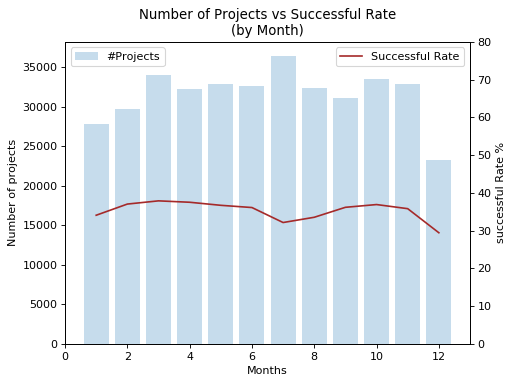

In [46]:
# to compare the number of launched project and the succesful rate by month

project_month_count = df.launched_month.value_counts().sort_index(ascending=True)
# project_month_count = project_month_count[years_values]

state_month_count = pd.crosstab(df['state'],df['launched_month'],margins=True)
state_month_rate = (state_month_count/state_month_count.loc['All']*100).round(2)
state_month_rate = state_month_rate.drop(['All']).drop(['All'],axis=1)
state_month_success_rate = state_month_rate.loc['successful']

fig = plt.figure(figsize=(15, 5), dpi= 80)
fig.tight_layout() 
plt.subplots_adjust(wspace = .3)

ax1 = plt.subplot(1, 2, 1)
plt.title('Number of Projects vs Successful Rate\n(by Month)')

ax2 = ax1.twinx()
ax1.bar(project_month_count.index, project_month_count.values, alpha = 0.25)
ax1.set_xlabel('Months')
ax1.set_ylabel('Number of projects')
ax1.legend(['#Projects'], loc=2)

ax2.set_ylabel('successful Rate %')
ax2.set_ylim(0,80)
ax2.plot(state_month_success_rate, color = 'brown')
ax2.legend(['Successful Rate'], loc=1)

plt.show()

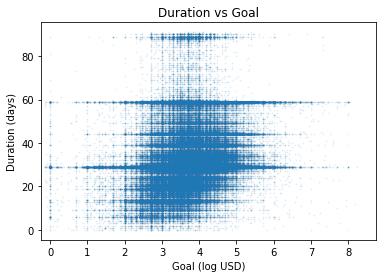

In [47]:
# duration vs goal
#
df[df['duration']<=100].plot(kind='scatter', x='log10_usd_goal_real', y='duration', s=0.5, alpha=0.1)
plt.xlim(-0.25)
plt.title('Duration vs Goal')
plt.xlabel('Goal (log USD)')
plt.ylabel('Duration (days)')
plt.show()

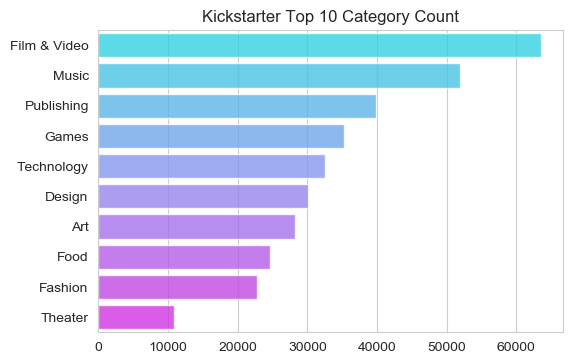

In [48]:
sns.set_style('whitegrid')
mains = df.main_category.value_counts().head(10)

x = mains.values
y = mains.index

fig = plt.figure(dpi=100)
ax = fig.add_subplot(111)
ax = sns.barplot(y=y, x=x, orient='h', palette="cool", alpha=0.8)

plt.title('Kickstarter Top 10 Category Count')
plt.show()